In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
PATH = '/home/clarkson/data/us_eq/cache' 

In [5]:
df = pd.read_pickle('{}/log_returns_cleaned.pkl'.format(PATH))

In [6]:
idx = pd.IndexSlice
t = df.loc['2019-01-01':'2019-07-19'].dropna(axis=1)
# print(t.columns[t])
data = df.loc['2019-01-01':'2019-07-19'].dropna(axis=1)
# data = df.interpolate()
data.iloc[:,:80].apply(lambda x: x / x.std()).corr()


ticker,AA,AABA,AAON,AAPL,ABC,ABCB,ABM,ABMD,ABT,ACHC,...,ASNA,ASRT,ASTE,ATGE,ATI,ATNI,ATO,ATR,ATVI,AVA
ticker,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,0.475914,0.445664,0.408605,0.179879,0.421166,0.370088,0.230450,0.240506,0.195396,...,0.072568,0.285152,0.205371,0.190977,0.487346,0.013117,-0.004073,0.209390,0.233844,0.094312
AABA,0.475914,1.000000,0.356507,0.690714,0.184613,0.390787,0.369566,0.307890,0.361597,0.236109,...,0.159272,0.213509,0.207381,0.125574,0.508452,0.070861,-0.119030,0.268067,0.383198,0.032906
AAON,0.445664,0.356507,1.000000,0.375317,0.281126,0.419049,0.393650,0.203802,0.324839,0.318720,...,0.116583,0.208362,0.218954,0.216264,0.416286,0.116253,0.055053,0.237432,0.182242,0.207403
AAPL,0.408605,0.690714,0.375317,1.000000,0.185748,0.244683,0.320678,0.286355,0.406274,0.299443,...,0.099753,0.220026,0.136996,0.241110,0.512288,0.165595,-0.130322,0.315561,0.421159,0.108740
ABC,0.179879,0.184613,0.281126,0.185748,1.000000,0.300741,0.329803,0.281020,0.261770,0.289088,...,0.087673,0.315626,-0.003835,0.201812,0.256598,0.173012,0.085499,0.296067,0.156627,0.190428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATNI,0.013117,0.070861,0.116253,0.165595,0.173012,0.235108,0.222610,0.092664,0.188160,0.133836,...,0.135076,0.138096,0.121845,-0.041607,0.216429,1.000000,0.094563,0.155321,0.167907,0.254942
ATO,-0.004073,-0.119030,0.055053,-0.130322,0.085499,-0.109802,0.065139,0.109235,0.248720,0.026185,...,-0.097428,-0.236466,-0.147946,0.044720,-0.165757,0.094563,1.000000,0.359777,-0.019195,0.357450
ATR,0.209390,0.268067,0.237432,0.315561,0.296067,0.246782,0.471200,0.363925,0.441808,0.237546,...,0.014974,-0.028388,0.018341,0.243967,0.240568,0.155321,0.359777,1.000000,0.200955,0.188265


In [16]:
# cov_matrix = data.apply(lambda x: x / x.std()).cov()
_data = data.iloc[:,:80]
corr = _data.corr()

print(_data.shape)
corr

(138, 80)


ticker,AA,AABA,AAON,AAPL,ABC,ABCB,ABM,ABMD,ABT,ACHC,...,ASNA,ASRT,ASTE,ATGE,ATI,ATNI,ATO,ATR,ATVI,AVA
ticker,,,,,,,,,,,,,,,,,,,,,
AA,1.000000,0.475914,0.445664,0.408605,0.179879,0.421166,0.370088,0.230450,0.240506,0.195396,...,0.072568,0.285152,0.205371,0.190977,0.487346,0.013117,-0.004073,0.209390,0.233844,0.094312
AABA,0.475914,1.000000,0.356507,0.690714,0.184613,0.390787,0.369566,0.307890,0.361597,0.236109,...,0.159272,0.213509,0.207381,0.125574,0.508452,0.070861,-0.119030,0.268067,0.383198,0.032906
AAON,0.445664,0.356507,1.000000,0.375317,0.281126,0.419049,0.393650,0.203802,0.324839,0.318720,...,0.116583,0.208362,0.218954,0.216264,0.416286,0.116253,0.055053,0.237432,0.182242,0.207403
AAPL,0.408605,0.690714,0.375317,1.000000,0.185748,0.244683,0.320678,0.286355,0.406274,0.299443,...,0.099753,0.220026,0.136996,0.241110,0.512288,0.165595,-0.130322,0.315561,0.421159,0.108740
ABC,0.179879,0.184613,0.281126,0.185748,1.000000,0.300741,0.329803,0.281020,0.261770,0.289088,...,0.087673,0.315626,-0.003835,0.201812,0.256598,0.173012,0.085499,0.296067,0.156627,0.190428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATNI,0.013117,0.070861,0.116253,0.165595,0.173012,0.235108,0.222610,0.092664,0.188160,0.133836,...,0.135076,0.138096,0.121845,-0.041607,0.216429,1.000000,0.094563,0.155321,0.167907,0.254942
ATO,-0.004073,-0.119030,0.055053,-0.130322,0.085499,-0.109802,0.065139,0.109235,0.248720,0.026185,...,-0.097428,-0.236466,-0.147946,0.044720,-0.165757,0.094563,1.000000,0.359777,-0.019195,0.357450
ATR,0.209390,0.268067,0.237432,0.315561,0.296067,0.246782,0.471200,0.363925,0.441808,0.237546,...,0.014974,-0.028388,0.018341,0.243967,0.240568,0.155321,0.359777,1.000000,0.200955,0.188265


In [5]:
w, v = np.linalg.eigh(corr)

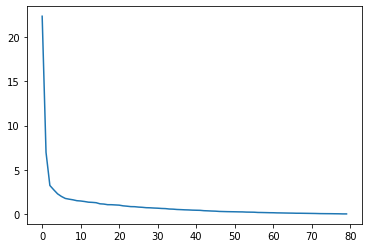

In [6]:
plt.plot([w for w in reversed(w)])

In [8]:
# normalise = lambda x: x / np.sum(x)
# eig_1 = pd.DataFrame(normalise(v[:,-1]), index=data.columns, columns=['Weight'])
# eig_2 = pd.DataFrame(normalise(v[:,-2]), index=data.columns, columns=['Weight'])
# # ax = plt
# # eig_1.plot(kind='bar')
# eig_1.hist(density=True, bins=50)
# eig_1.plot.kde()
# eig_2.hist(density=True, bins=50)
# eig_2.plot.kde()

# eig_50 = pd.DataFrame(normalise(v[:,-50]), index=data.columns, columns=['Weight'])
# eig_50.hist(density=True, bins=50)
# eig_50.plot.kde()


# # eig_2.plot(kind='bar')

In [9]:
import src.random_matrix as rm

In [1]:
import importlib; importlib.reload(rm)
compare_spectrum_to_mp = rm.compare_spectrum_to_mp
n, p = _data.shape
compare_spectrum_to_mp(corr, n, sigma=1)

NameError: name 'rm' is not defined

In [19]:
l,u = rm.mp_eval_bounds(p/n)
print(p/n)
print(w[w>u])

0.5797101449275363
[ 3.2382928   6.97345563 22.32762367]
